In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [2]:
# Leer datos de residencias sancionadas en Madrid
sanci = pd.read_csv('201911_residencias_madrid.csv',encoding = 'UTF-8'
                     ,delimiter = ',')
sanci.columns=['empresa','centro','resol','year','motivo','sancion']
sanci.head()

,empresa,centro,resol,year,motivo,sancion
0,ASOCIACIÓN DE ANGELES URBANOS,"ANGELES URBANOS HORTALEZA, CO",2723/2016,2016,29.c,42003
1,ASOCIACIÓN DE ANGELES URBANOS,"ANGELES URBANOS HORTALEZA, CO",2723/2016,2016,28.c,NaN
2,ASOCIACIÓN DE ANGELES URBANOS,"ANGELES URBANOS HORTALEZA, CO",2723/2016,2016,28.i,NaN
3,ASOCIACIÓN BETEL,CENTRO NO INSCRITO,36/2016,2016,29.b,30001
4,ATIPADACE,"ATIPADACE, CD",752/2016,2016,29.b,30001


In [3]:
def calculatelevel(row):
    if '27' in row['motivo']:
        level = 'L'
    elif '28' in row['motivo']:
        level = 'G'
    elif '29' in row['motivo']:
        level = 'MG'
    else:
        level = 'D'
    return level

sanci['nivelinfra'] = sanci.apply (lambda row: calculatelevel(row), axis=1)

In [4]:
# Nº de resoluciones en los últimos años
sanci['resol'].nunique()

166

In [5]:
# Nº de sanciones en los últimos años
sanci['motivo'].count()

292

In [16]:
# Nº de empresas sancionadas en los últimos años
sancionadas =sanci['empresa'].nunique()
no_sancionadas = 472 - sancionadas
sancionadas

129

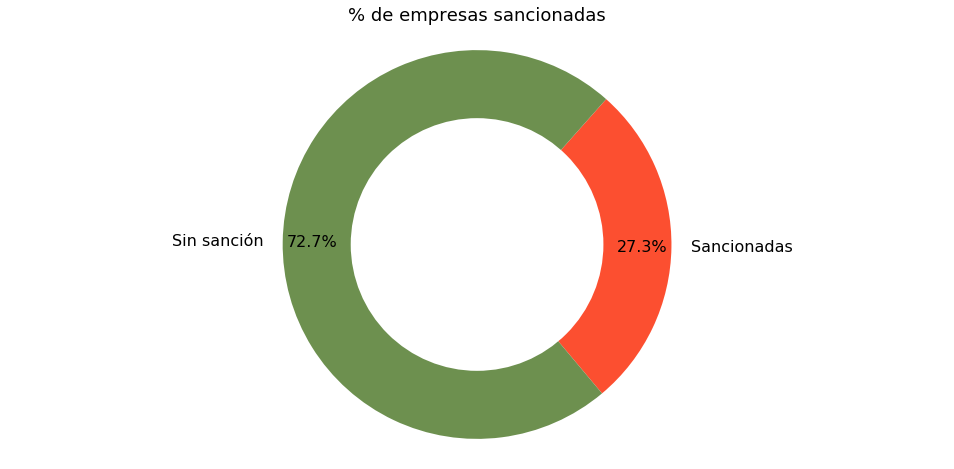

In [9]:
# Pie chart
labels = ['Sancionadas', 'Sin sanción']
sizes = [sancionadas, no_sancionadas]
#colors
colors = [sns.color_palette()[1],sns.color_palette()[3]]
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=-50, pctdistance=0.85,
        textprops={'fontsize': 16})
#draw circle
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('% de empresas sancionadas',fontsize= 18)
plt.savefig('images/ratio-sancionadas.png', bbox_inches='tight', pad_inches=0.3, dpi=220,facecolor='white')
plt.show()

In [10]:
# Agrupación de sanciones por gravedad y año
motivosxnivel = pd.pivot_table(sanci,index=['year'],values=["resol"],
               columns=['nivelinfra'],aggfunc=[len]).reset_index()
motivosxnivel.columns = ['year','G','L','MG']
motivosxnivel

,year,G,L,MG
0,2014,39,5,3
1,2015,56,9,7
2,2016,41,7,12
3,2017,29,3,5
4,2018,65,3,8


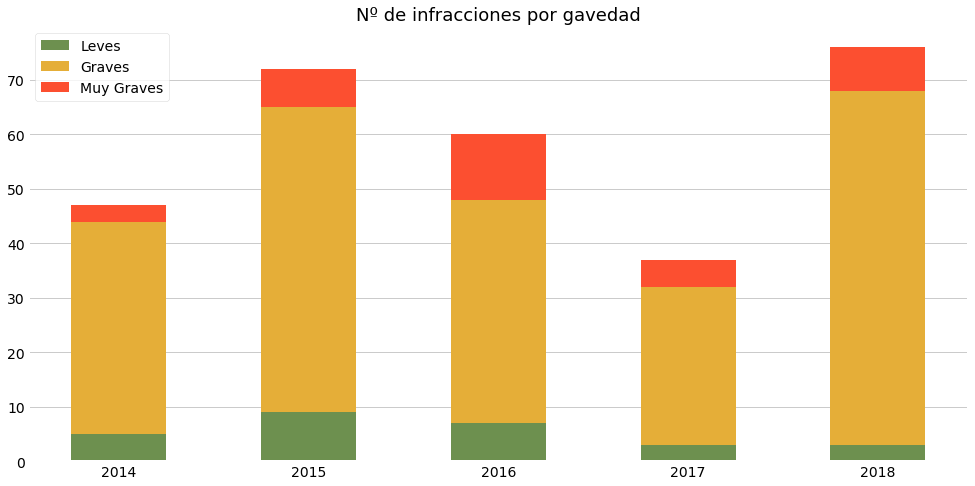

In [11]:
# dibujar infracciones por nivel de gravedad y año

x = motivosxnivel['year']
y1 = motivosxnivel['L']
y2 = motivosxnivel['G']
y3 = motivosxnivel['MG']

plt.bar(x, y1, alpha=1, color=sns.color_palette()[3], label = 'Leves'
        ,width=0.5)
plt.bar(x, y2, alpha=1, color=sns.color_palette()[2], bottom = y1, label = 'Graves'
        ,width=0.5)
plt.bar(x, y3, alpha=1, color=sns.color_palette()[1], bottom = y1+y2, label = 'Muy Graves'
        ,width=0.5)

plt.xticks(x,rotation = 0)
plt.grid(axis='y')
plt.legend()
plt.title('Nº de infracciones por gavedad',fontsize= 18)
plt.savefig('images/infra_gravedad.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [12]:
motivos = sanci.groupby(['motivo'])['empresa'].count().reset_index()


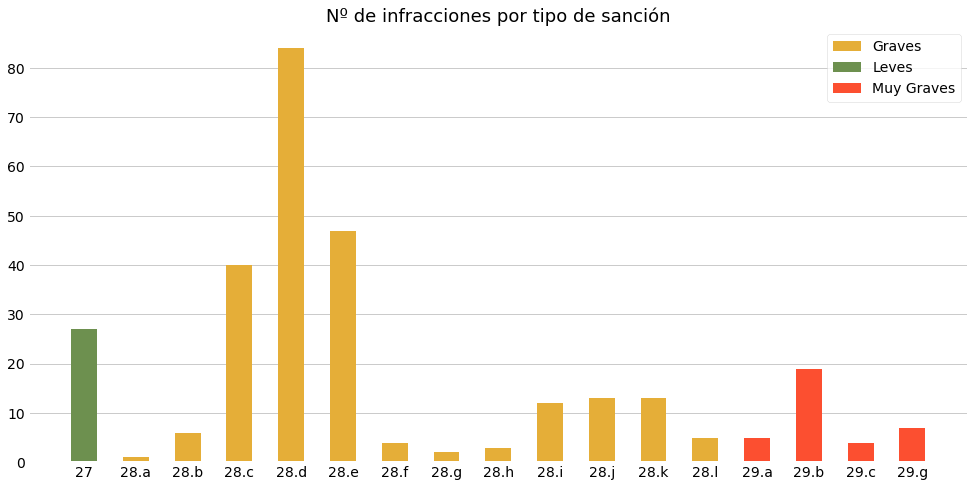

In [14]:
# dibujar infracciones por motivo

x = motivos['motivo']
y = motivos['empresa']

plt.bar(x, y, alpha=1, color=sns.color_palette()[2],label ='Graves',width=0.5)
plt.bar(x[0], y[0], alpha=1, color=sns.color_palette()[3],label ='Leves',width=0.5)
plt.bar(x[-4:], y[-4:], alpha=1, color=sns.color_palette()[1],label ='Muy Graves',width=0.5)

plt.xticks(x,rotation = 0)
plt.grid(axis='y')
plt.legend()
plt.title('Nº de infracciones por tipo de sanción',fontsize= 18)
plt.savefig('images/infra_motivo.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

In [17]:
# Residencias con más sanciones
sumasanci = sanci.groupby(['empresa'])['motivo'].nunique().reset_index()
sumasanci[sumasanci['motivo']>5].sort_values(by=['motivo'],ascending=False)

,empresa,motivo
91,"RESIDENCIA DE LA TERCERA EDAD SIERRA SALUD, S.L.",13
79,MILAGROS DEL CARMEN MASÍAS NÚÑEZ,9
86,"REMEDIPE, S.L.",8
65,"GESTORA DE RESIDENCIAS SAN FERNANDO, S.L.",6
115,ROSARIO MAYA AVIAS,6
